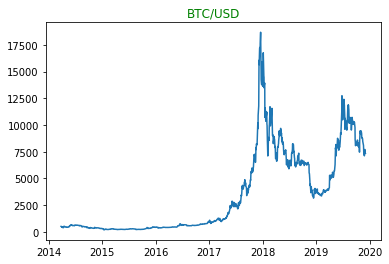

In [51]:
# 1/1 LOADING AND PLOTTING

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('bitcoin.csv', index_col='Date', parse_dates=True)
df = df['Close']

plt.plot(df.index, df)
plt.title('BTC/USD', color='green')
plt.show()

# plt.plot(df)
# plt.ylabel('some numbers')
# plt.show()


# fig, ax = plt.subplots()
# df.plot(ax=ax, color='gold')
# plt.title('BTCxUSD', color='green')
# plt.show()

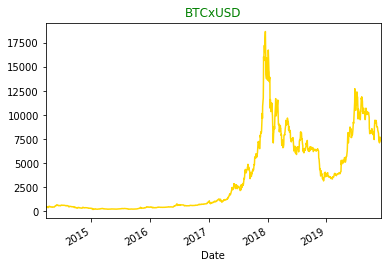

In [52]:
# 1/1 TREND
fig, ax = plt.subplots()
df.plot(ax=ax, color='gold')
plt.title('BTCxUSD', color='green')
plt.show()

In [53]:
# 1/1 TRAIN-TEST SPLIT

# Train data - all data up to the end of 2018
df_train = df.loc['2017':'2018']

# Test data - all data from 2019 onwards
df_test = df.loc['2019':]

# df_train
print(df_train) # TRAIN SAMPLE
print(df_test) # TEST SAMPLE

Date
2017-01-02    1012.34
2017-01-03    1024.38
2017-01-04    1091.66
2017-01-05     971.26
2017-01-06     898.16
               ...   
2018-12-25    3789.31
2018-12-26    3775.47
2018-12-27    3585.43
2018-12-28    3892.14
2018-12-31    3674.18
Name: Close, Length: 521, dtype: float64
Date
2019-01-01    3720.60
2019-01-02    3884.98
2019-01-03    3794.92
2019-01-04    3833.53
2019-01-07    4005.34
               ...   
2019-11-27    7550.07
2019-11-28    7564.94
2019-11-29    7710.34
2019-12-02    7319.36
2019-12-03    7333.02
Name: Close, Length: 241, dtype: float64


In [54]:
# 1/2 APPLYING THE ADFULLER TEST (Augmented Dicky-Fuller test)
# the test to decide the difference order (how many times we have to difference the data)
from statsmodels.tsa.stattools import adfuller

results = adfuller(df)
print("ADFULLER TEST RESULT: ", results)

# Перше значення (t-stat s not negative --> non-stationary)
# Друге значення (p-value>0.05 --> non-stationary)
# у фігурних дужках - критичні значення по p-value -->
     # --> якщо рівень значимості p-value < 5% --
     #     то t-stat має бути менше від -2.86


ADFULLER TEST RESULT:  (-1.565982937410079, 0.5006552536948559, 18, 1464, {'1%': -3.4348245921503673, '5%': -2.8635162368565643, '10%': -2.5678221302703874}, 20674.807970741167)


Date
2014-03-28     -9.58
2014-03-31    -38.25
2014-04-01     16.48
2014-04-02    -52.37
2014-04-03      6.37
               ...  
2019-11-27    436.56
2019-11-28     14.87
2019-11-29    145.40
2019-12-02   -390.98
2019-12-03     13.66
Name: Close, Length: 1482, dtype: float64


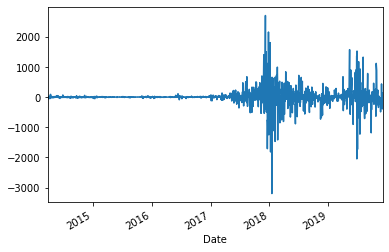

In [26]:
# 1/2 TAKING THE DIFFERENCE (pandas)

df_stationary = df.diff().dropna()
print(df_stationary)


# our df after taking the difference --> stationary (at least visually).
                                # U can compare w/ a pic scrolling upper +3
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.show() # RESULT: +

Date
2014-03-27    6.241406
2014-03-28    6.222576
2014-03-31    6.143649
2014-04-01    6.178421
2014-04-02    6.063460
                ...   
2019-11-27    8.929312
2019-11-28    8.931280
2019-11-29    8.950318
2019-12-02    8.898278
2019-12-03    8.900143
Name: Close, Length: 1483, dtype: float64


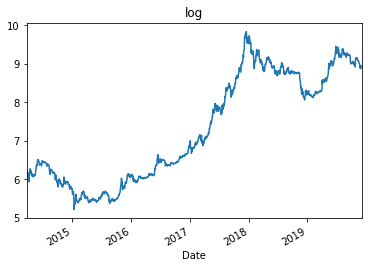

Date
2014-03-27    22.662304
2014-03-28    22.449944
2014-03-31    21.581242
2014-04-01    21.959736
2014-04-02    20.733065
                ...    
2019-11-27    86.891139
2019-11-28    86.976664
2019-11-29    87.808542
2019-12-02    85.553258
2019-12-03    85.633054
Name: Close, Length: 1483, dtype: float64


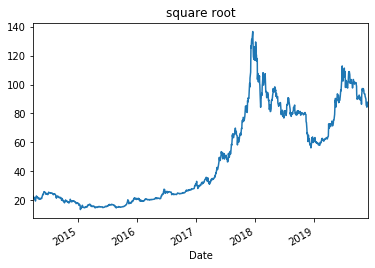

Date
2014-03-27         NaN
2014-03-28    1.019008
2014-03-31    1.082126
2014-04-01    0.965825
2014-04-02    1.121830
                ...   
2019-11-27    0.942178
2019-11-28    0.998034
2019-11-29    0.981142
2019-12-02    1.053417
2019-12-03    0.998137
Name: Close, Length: 1483, dtype: float64


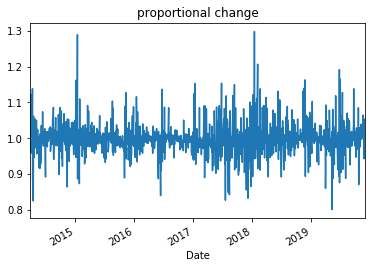

In [29]:
# 1/2 ANOTHER WAYS TO MAKE TS STATIONARY:

## TAKING THE LOG (pandas)
d = np.log(df)
print(d)

fig, ax = plt.subplots()
d.plot(ax=ax)
plt.title("log")
plt.show() # візуально цей спосіб нам не поміг. TS s still non-stationary.
                                # RESULT: -



## TAKE THE SQUARE ROOT
s = np.sqrt(df)
print(s)

fig, ax = plt.subplots()
s.plot(ax=ax)
plt.title("square root")
plt.show()                      # RESULT: -




# TAKE THE PROPORTIONAL CHANGE
a = df.shift(1)/df
print(a)
# our df after taking the difference --> stationary (at least visually).
                                # U can compare w/ a pic scrolling up
fig, ax = plt.subplots()
a.plot(ax=ax)
plt.title("proportional change")
plt.show()                    # RESULT: +

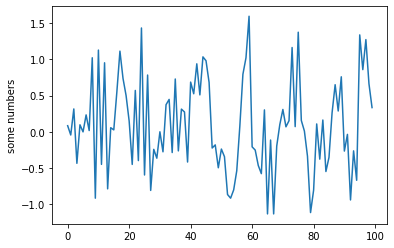

In [38]:
# 1/3 CREATING ARMA DATA #####################################################
##############################################################################
##############################################################################
# creating data via parameters


# import arma-generate-sample function
from statsmodels.tsa.arima_process import arma_generate_sample
ar_coefs = [1]
ma_coefs = [1, 0.2486, 0.6050, -0.0424]

y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5)
# print(y)



# ARRAY PLOT
plt.plot(y)
plt.ylabel('some numbers')
plt.show()

In [56]:
# 1/3 FITTING DATA

# import ARMA model class
from statsmodels.tsa.arima_model import ARMA

# INSTANTIATE model object -- створення та відфічення моделі
model = ARMA(y, order=(1,1))
results = model.fit()

In [ ]:
# 2/1 CREATING A MODEL
from statsmodels.tsa.arima_model import ARMA
model = ARMA(timeseries, order=(p,q))

In [ ]:
# 2/1 CREATING AR & MA MODELS
ar_model = ARMA(timeseries, order=(p,0))
ma_model = ARMA(timeseries, order=(0,q))

In [41]:
# 2/1 FITTING THE MODEL & FIT SUMMARY ###################################################
##############################################################################
##############################################################################
# looking for parameters to create the data

model = ARMA(y, order=(0,3))
results = model.fit()

print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 3)   Log Likelihood                 -73.653
Method:                       css-mle   S.D. of innovations              0.502
Date:                Fri, 24 Apr 2020   AIC                            157.306
Time:                        22:26:06   BIC                            170.332
Sample:                             0   HQIC                           162.578
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1026      0.092      1.119      0.266      -0.077       0.282
ma.L1.y        0.2098      0.096      2.183      0.031       0.021       0.398
ma.L2.y        0.6978      0.072      9.744      0.0

In [ ]:
# 2/1 ARMAX
model = ARMA(df['productivity'], order=(2,1), exog=df['hours_sleep'])
# exog - exogenous variable - екзогенна/незалежна змінна
results = model.fit()

F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2019-10-30    9426.789004
2019-10-31    9174.593988
2019-11-01    9171.598056
2019-11-04    9194.022736
2019-11-05    9417.924171
2019-11-06    9340.868599
2019-11-07    9297.859851
2019-11-08    9194.949601
2019-11-11    8859.709936
2019-11-12    8723.845579
2019-11-13    8747.775354
2019-11-14    8736.910818
2019-11-15    8638.016189
2019-11-18    8444.250448
2019-11-19    8211.006886
2019-11-20    8097.250734
2019-11-21    8074.318999
2019-11-22    7600.311802
2019-11-25    7339.976888
2019-11-26    7207.079039
2019-11-27    7105.695677
2019-11-28    7525.273767
2019-11-29    7551.782356
2019-12-02    7693.267117
2019-12-03    7318.959807
dtype: float64
            lower Close   upper Close
Date                                 
2019-10-30  8850.882439  10002.695568
2019-10-31  8598.687424   9750.500552
2019-11-01  8595.691492   9747.504621
2019-11-04  8618.116171   9769.929300
2019-11-05  8842.017607   9993.830736
2019-11-06  8764.962034   9916.775163
2019-11-07  8721.953287   

NameError: name 'Date' is not defined

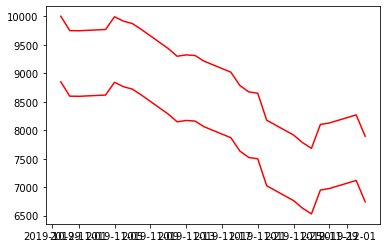

In [50]:
# 2/2 Statsmodels SARIMAX class

from statsmodels.tsa.statespace.sarimax import SARIMAX

# just an ARMA(p,q) model
# створюємо модель
model = SARIMAX(df, order=(1,0,1), trend='c') # 'c' -- constant term

# Make IN-sample PREDICTIONS for LAST 25 values
# fit the model & launch forecast
results = model.fit()
forecast = results.get_prediction(start=-25)

# FORECAST MEAN
# looking for a forecast mean
mean_forecast = forecast.predicted_mean
print(mean_forecast) # pandas series

# GET CONFIDENCE INTERVALS OF FORECASTS
# looking for a forecast confidence intervals
confidence_intervals = forecast.conf_int()
print(confidence_intevals) # pandas DataFrame of lower & upper uncertainty range of prediction

# Select lower and upper confidence limits
# ф-ція .loc розділяє
lower_limits = confidence_intervals.loc[:,'lower Close']
upper_limits = confidence_intervals.loc[:,'upper Close']

# PLOTTING PREDICTIONS
plt.figure()
plt.plot(mean_forecast.index,
         lower_limits, upper_limits,
        color='red',
        label='forecast')

# Shade uncertainty area
plt.fill_between(Date, lower_limits, upper_limits, color='pink')

plt.show()

# plot the amazon data
plt.plot(amazon.index, amazon, label='observed')

# DYNAMIC PREDICTIONS
results = model.fit()
forecast = results.get_prediction(start=-25, dynamic=True) # in-sample


# FORECASTING OUT-OF-SAMPLE !!! OUT!!!
results = model.fit() # fitting
forecast = results.get_forecast(steps=20) # forecasting
mean_forecast = forecast.predicted_mean # mean
confidence_intervals = forecast.conf_int() # conf int-s
# this is also a dynamic forecast

In [ ]:
# 2/3 Reconstructing original TS after differencing

diff_forecast = results.get_forecast(steps=10).predicted_mean

from numpy import cumsum
mean_forecast = cumsum(diff_forecast) + df.iloc[-1,0]
# how much the TS changed from its initial value over the forecast period
# to get the abs. value we have to add the last value of the original TS to this
# We now have a forecast of the non-stationary TS
# We have to make the same w/ uncertainties

In [ ]:
# 2/3 Using the ARIMA model

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model
model = SARIMAX(df, order=(2,1,1))
# we want to difference the TS data just once (second order) & apply ARMA(2,1) model
# We now don't have to think about differencing anymore

# Fit model
model.fit()

# Make forecast
mean_forecast = results.get_forecast(steps=10).predicted_mean
# THIS IS MUCH EASIER!!!


In [325]:
# 2/3 Difference order picking

# Dicky-Fuller Test
adf = adfuller(df.iloc[:,0])
print('ADF Statistic:', adf[0])
print('p-value', adf[1])

# u have to change 'df' to df w/ 'Close' & 'return' in the 1. block of code

ADF Statistic: -1.565982937410079
p-value 0.5006552536948559


In [ ]:
# Як прогнозувати difference values

# дані диференціюються (віднімаються, аби стати stationary)
# модель створюється,
# фітиться (тренується),
# форкаститься,
# міниться,
# конф-інтервали'ться,
# плотиться.

In [ ]:
# Як прогнозувати absolute values ---> це все робить ARIMA

# дані диференціюються (віднімаються, аби стати stationary)
# модель створюється,
# фітиться (тренується),
# форкаститься,
# інтегрується до абсолютних значень
# створюється "абсолютний" прогноз

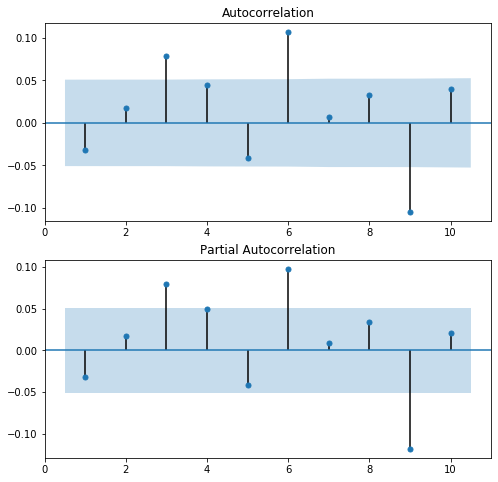

In [368]:
# make a stationary data
aaa = df.diff().dropna()


# 3/1 ACF / PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,8))

# Make ACF plot
plot_acf(aaa, lags=10, zero=False, ax=ax1)

# Make PACF plot
plot_pacf(aaa, lags=10, zero=False, ax=ax2)

plt.show()

# AR(1) model
# if the corr at lag-1 is very negative == we take a diff to many times

In [376]:
# 3/2 INTRO TO AIC & BIC

# Create model
model = SARIMAX(df, order=(1,0,1))

# Fit model
results = model.fit()

# Print fit summary
print(results.summary())

# Print AIC & BIC
print('AIC:', results.aic)
print('BIC:', results.bic)



order_aic_bic = []
# Loop over AR order
for p in range(3):
    # Loop over MA order
    for q in range(3):
        # Fit model
        model = SARIMAX(df, order=(p,0,q))
        results = model.fit()
        
        # Add order & scores to list
        order_aic_bic.append((p, q, results.aic, results.bic))
        
# Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order_aic_bic, columns=['p','q','aic','bic'])

F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 1483
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -10534.618
Date:                Thu, 23 Apr 2020   AIC                          21075.236
Time:                        19:50:15   BIC                          21091.141
Sample:                             0   HQIC                         21081.165
                               - 1483                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9992      0.001   1613.228      0.000       0.998       1.000
ma.L1         -0.0309      0.010     -3.187      0.001      -0.050      -0.012
sigma2      8.648e+04    853.724    101.301      0.0

F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\progs\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. fore